# Machine Learning Nanodegree Capstone Project

## Computer Vision

## Project: Write an Algorithm for a Image  Classification App 

---
 
Computer vision is an interdisciplinary field that deals with how computers can be made for gaining high-level understanding from digital images or videos. From the perspective of engineering, it seeks to automate tasks that the human visual system can do. Computer vision tasks include methods for acquiring, processing, analyzing and understanding digital images, and extraction of high-dimensional data from the real world in order to produce numerical or symbolic information, e.g., in the forms of decisions. Understanding in this context means the transformation of visual images into descriptions of the world that can interface with other thought processes and elicit appropriate action. This image understanding can be seen as the disentangling of symbolic information from image data using models constructed with the aid of geometry, physics, statistics, and learning theory.

In this project, I will try different algrithms to build a image classication model. The system is supposed to learn associations between word(lable) used to describe an image and the visual features found in it, and gets better at predicting descriptions on its own.

> **The candidate algrithms are**:  
  * CNN from Scratch
  * CNN from Transfer Learning
  * Bag of Words model combining Supervised Learning and Unsupervised Learning

---
### Why We're Here 

In this notebook, I will make the full process towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, the code will accept any user-supplied image as input.  The model will provide an estimate of the image category. We use Caltech101 Image Dataset to train the model. There are 102 classes in Images labels. So we only accept images from the 102 classes which provide by users for estimate.


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets(Caltech101 Image dataset)
* [Step 1](#step1): Pre-process Datasets
* [Step 2](#step2): Create a CNN from Scratch
* [Step 3](#step3): Trials for Transfer Learning to Classify Images
* [Step 4](#step4): Trials for Bag of Words to Classify Images
* [Step 5](#step5): Step 5: Test the Model



---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Caltech-101 Image Dataset

In the code cell below, we import images data from Caltech-101 Image Dataset.  We populate the image data to the `data` dictionary.And have a look on how the dictionary and image data look like.


In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt 
# load images datasets to dictionary like data

data = load_files('101_ObjectCategories/') 
print ("Read images into dictionary, the keys are ",data.keys())
print ("The first 10 images have targets",data['target'][:10])
print ("The first 10 images have filenames",data['filenames'][:10])
print ("The first 10 images have target_names",data['target_names'][:10])
print ("The length of a image data %i" % len(data['data'][0]))
print ("The total categories of images are %i" % len(data['target_names']))
print ("The image data looks like", data['data'][0][:100])
print ("The full categories are",data['target_names'])







Using TensorFlow backend.


('Read images into dictionary, the keys are ', ['target_names', 'data', 'target', 'DESCR', 'filenames'])
('The first 10 images have targets', array([ 6,  6, 12,  4,  6,  0,  4, 18, 83,  2]))
('The first 10 images have filenames', array(['101_ObjectCategories/airplanes/image_0669.jpg',
       '101_ObjectCategories/airplanes/image_0531.jpg',
       '101_ObjectCategories/binocular/image_0014.jpg',
       '101_ObjectCategories/Motorbikes/image_0204.jpg',
       '101_ObjectCategories/airplanes/image_0111.jpg',
       '101_ObjectCategories/BACKGROUND_Google/image_0254.jpg',
       '101_ObjectCategories/Motorbikes/image_0367.jpg',
       '101_ObjectCategories/camera/image_0001.jpg',
       '101_ObjectCategories/sea_horse/image_0003.jpg',
       '101_ObjectCategories/Faces_easy/image_0318.jpg'],
      dtype='|S53'))
('The first 10 images have target_names', ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel'])
The length of

## Step 1: Pre-process Datasets

### Exploration of Dataset

Populating the interactive namespace from numpy and matplotlib
Statistic of Images Count in Each Target


count    102.000000
mean      89.656863
std      123.678960
min       31.000000
25%       45.000000
50%       59.000000
75%       80.750000
max      800.000000
Name: images_count, dtype: float64

('The maximum category is', 'airplanes')
('The minimun category is', 'inline_skate')


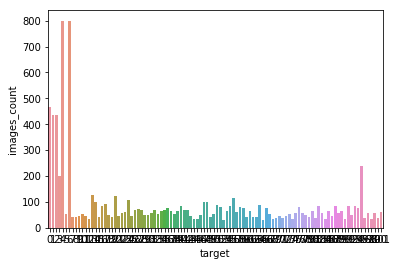

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

target_num=[]
target=[]
for c in range(102):    
    target_num.append(sum(data['target']==c))
    target.append(c)

target_num_df=pd.DataFrame(target_num,columns=['images_count'])
target_num_df.insert(loc=target_num_df.shape[1],column='target',value=target)
#print (target_num_df)
print("Statistic of Images Count in Each Target")
display(target_num_df['images_count'].describe())

print ("The maximum category is", data['target_names'][np.argmax(target_num)])
print ("The minimun category is",data['target_names'][np.argmin(target_num)])

sns.barplot(x='target',y='images_count',data=target_num_df)


In [3]:
img_files = np.array(data['filenames'])    #read image filenames to array
img_targets = np_utils.to_categorical(np.array(data['target']), 102) #transform target label to one hot encoding array

In [21]:
'''
###Here code is to create a subset of the whole dataset. The subset contains the first 30 images in each target

filenames_df=pd.DataFrame(data['filenames'],columns=['filename'])

#print (len(filenames_df))
img_files=[]
img_targets=[]
for c in range(102):
    index=target_df[target_df.target==c].index
    #print (index)
    #print (len(index))
    tempf=filenames_df['filename'].iloc[index[:30]]
    tempt=target_df['target'].iloc[index[:30]]
    for i in range(len(tempf)):
        img_files.append(tempf.iloc[i])
        img_targets.append(tempt.iloc[i])
img_files=np.array(img_files) #read image filenames to array

img_targets=np_utils.to_categorical(np.array(img_targets), 102) #transform target label to one hot encoding array
print (len(img_files),len(img_targets))
print (img_files[0])
'''

(3060, 3060)
101_ObjectCategories/BACKGROUND_Google/image_0254.jpg


### Transform Image to Tensors

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape (nb_samples,rows,columns,channels),

We use `path_to_tensor` function to transform image file to a tensor, and use `paths_to_tensor`function to stack the list of images tensors

In [4]:
from keras.preprocessing import image                  
from tqdm import tqdm
from PIL import ImageFile                            

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

100%|██████████| 9145/9145 [00:15<00:00, 574.66it/s]


The total number of images is 9145
('The shape of tensor stack is', (9145, 224, 224, 3))


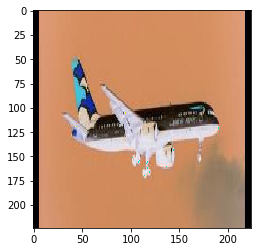

In [5]:
#img=image.load_img('101_ObjectCategories/BACKGROUND_Google/image_0254.jpg', target_size=(224, 224))
img_tensors = paths_to_tensor(img_files)
print ("The total number of images is %i" % len(img_tensors))
print ("The shape of tensor stack is",img_tensors.shape)
plt.imshow(img_tensors[0])
plt.show()

## Step 2:  Create a CNN to Classify Images (from Scratch)
In the first approach, we create a CNN from scratch to classify the images and evaluate the model performance. 

### Train Test Split
We use `train_test_split` from `sklearn` to produce train set, valid set, and test set. We need to split the data for 2 times.

In [6]:
from sklearn.model_selection import train_test_split

X_trainandvalid,X_test,y_trainandvalid,y_test = train_test_split(img_tensors,img_targets,test_size=0.1,random_state=24)
X_train,X_valid,y_train,y_valid = train_test_split(X_trainandvalid,y_trainandvalid,test_size=0.1,random_state=24)
print ("We have %i images in train set" % len(X_train))
print ("We have %i images in validation set" % len(X_valid))
print ("We have %i images in test set" % len(X_test))
train_tensors=X_train
train_targets=y_train
valid_tensors=X_valid
valid_targets=y_valid
test_tensors=X_test
test_targets=y_test


We have 7407 images in train set
We have 823 images in validation set
We have 915 images in test set


### CNN Scratch

We feed the model with the tensor shape(224,224,3) and  add a full connect layer with 102 classes.

In [7]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
first_filters=16
poolsize=2
### TODO: Define your architecture.
model.add(Conv2D(filters=16,kernel_size=2,strides=2,activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=poolsize))
model.add(Conv2D(filters=32,kernel_size=1,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=poolsize))
model.add(Conv2D(filters=64,kernel_size=1,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=poolsize))
model.add(Conv2D(filters=128,kernel_size=1,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=poolsize))
model.add(GlobalAveragePooling2D())
model.add(Dense(102, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       8320      
__________

In [8]:


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We have 10 epoches training. And we save the model  weights in a file when the validation set accuracy is improved. 

In [13]:
from keras.callbacks import ModelCheckpoint  
from keras.utils import np_utils

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)


model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
         epochs=10, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 7407 samples, validate on 823 samples
Epoch 1/10
7407/7407 [==============================] - 9s - loss: 2.6823 - acc: 0.3956 - val_loss: 3.0778 - val_acc: 0.3670
Epoch 2/10
7407/7407 [==============================] - 9s - loss: 2.6716 - acc: 0.3975 - val_loss: 3.0480 - val_acc: 0.3499
Epoch 3/10
7407/7407 [==============================] - 9s - loss: 2.6557 - acc: 0.4054 - val_loss: 3.2918 - val_acc: 0.2928
Epoch 4/10
7407/7407 [==============================] - 9s - loss: 2.6425 - acc: 0.4085 - val_loss: 2.9287 - val_acc: 0.3803
Epoch 5/10
7407/7407 [==============================] - 9s - loss: 2.6151 - acc: 0.4085 - val_loss: 3.0025 - val_acc: 0.3670
Epoch 6/10
7407/7407 [==============================] - 9s - loss: 2.6104 - acc: 0.4126 - val_loss: 2.8862 - val_acc: 0.3791
Epoch 7/10
7407/7407 [==============================] - 9s - loss: 2.5905 - acc: 0.4073 - val_loss: 2.8963 - val_acc: 0.3985
Epoch 8/10
7407/7407 [==============================] - 9s - loss: 2.5764 - ac

After the 10 epoches training is completed. We load the best model from the file and test the accuracy with test set. 
In the model.predict(), it outputs each probability of each classes, the class with the largest probability is the classification result. 
We got a test accuracy of 40% ,f1score of 0.18 and we have not  use data augmentation yet. The predict time on test set is 1.5 seconds

In [14]:
model.load_weights('weights.best.from_scratch.hdf5')
from time import time

start = time()
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
end =time ()
# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print ("The predict time on test set is %f seconds" % (end-start))
print('Test accuracy: %.4f%%' % test_accuracy)


from sklearn.metrics import f1_score,precision_score,recall_score
from keras.metrics import categorical_accuracy
#print (predictions)
y_true=[np.argmax(tensor) for tensor in test_targets]
#print (y_true) 

labels=[]
for i in range(102):
    labels.append(c)
precisionscore=precision_score(y_true, predictions, labels=labels, average=None, sample_weight=None)
recallscore=recall_score(y_true, predictions, labels=labels, average=None, sample_weight=None)
f1score=f1_score(y_true, predictions, labels=labels, average=None, sample_weight=None)

print ("Each category precision score is:",precisionscore)
print ("Each category recall score is:",recallscore)
print ("Each category f1  score is:",f1score)

The predict time on test set is 1.500675 seconds
Test accuracy: 38.0000%
('Each category precision score is:', array([ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33

### Parameters Tuning of CNN from Scratch


Here we use `keras.wrappers.scikit_learn` to wrap the CNN from scratch model and tune parameters with `Gridsearchcv` in `scikit-learn`. We set `cv=5`, so we have more image data for training. We tune the `filters` and `optimizer`. Be noticed that we can't set `callbacks=[checkpointer]`, so we don't use validation set.We use the `accuracy` which is the metric of estimator to evaluate.  And we show `best_parameters` and `best_score` of `gridsearchcv`.

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV
def build_classifier(first_filters,poolsize,optimizer):
    model2 = Sequential()
    

    model2.add(Conv2D(filters=first_filters,kernel_size=2,strides=2,activation='relu',input_shape=(224,224,3)))
    model2.add(MaxPooling2D(pool_size=poolsize))
    model2.add(Conv2D(filters=first_filters*2,kernel_size=1,strides=1,activation='relu'))
    model2.add(MaxPooling2D(pool_size=poolsize))
    model2.add(Conv2D(filters=first_filters*4,kernel_size=1,strides=1,activation='relu'))
    model2.add(MaxPooling2D(pool_size=poolsize))
    model2.add(Conv2D(filters=first_filters*8,kernel_size=1,strides=1,activation='relu'))
    model2.add(MaxPooling2D(pool_size=poolsize))
    model2.add(GlobalAveragePooling2D())
    model2.add(Dense(102, activation='softmax'))
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model2

#from sklearn.metrics import f1_score, make_scorer
#f1_scorer = make_scorer(f1_score,y_true,labels=labels)
cnnscratchmodel=KerasClassifier(build_fn=build_classifier,verbose=1)
params={
        'first_filters':[16,32],
        'poolsize':[2],
        'optimizer': ['adam', 'rmsprop'],
        'epochs':[5],
         'batch_size':[20] }
grid_search = GridSearchCV(estimator = cnnscratchmodel,
                           param_grid = params,                          
                           cv = 5)    

grid_search.fit(train_tensors, train_targets)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/5
5925/5925 [==============================] - 7s - loss: 7.1153 - acc: 0.1053     
Epoch 2/5
5925/5925 [==============================] - 7s - loss: 3.8090 - acc: 0.1949     
Epoch 3/5
5925/5925 [==============================] - 7s - loss: 3.5692 - acc: 0.2456     
Epoch 4/5
5925/5925 [==============================] - 7s - loss: 3.3593 - acc: 0.2770     
Epoch 5/5
5925/5925 [==============================] - 7s - loss: 5.7588 - acc: 0.1303     
Epoch 2/5
5925/5925 [==============================] - 7s - loss: 3.7594 - acc: 0.2262     
Epoch 3/5
5925/5925 [==============================] - 7s - loss: 3.5385 - acc: 0.2596     
Epoch 4/5
5925/5925 [==============================] - 7s - loss: 3.3788 - acc: 0.2864     
Epoch 5/5
5926/5926 [==============================] - 7s - loss: 16.0040 - acc: 0.0064     
Epoch 2/5
5926/5926 [==============================] - 7s - loss: 16.0392 - acc: 0.0049     
Epoch 3/5
5926/5926 [==============================] - 7s - loss: 16.0392 - ac

In [15]:
print ("The best parameters are:",best_parameters)
print ("The best accuracy is:",best_accuracy)

('The best parameters are:', {'epochs': 5, 'first_filters': 16, 'optimizer': 'rmsprop', 'poolsize': 2, 'batch_size': 20})
('The best accuracy is:', 0.25489402489654445)


We see the best parameters(`first_filters`,`optimizer`) is the same with the previous CNN from scratch model.  

## Step 3:  Trials for Transfer Learning to Classify Images
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning. Models for image classification with weights trained on ImageNet:

* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet

I selected RetNet50 for transfer learning trail. The size of RetNet50 is reletively small(99M).I think it will be faster than the large model applications such as VGG16 and VGG19 which are both >500M. I have tried with RetNet50 in two ways.

### Way1: Train ResNet50 Starting from None Weight 

In the first way, I trained ResNet50 CNN architechture starting from  weights is None and including the fully-connected layer at the top of the network and setting classes=102. I know it is not real transfer learning. Just a curiously trial.  Let's see how  the ResNet50 architecture training result looks like. 

In [16]:
from keras import applications
Resnet50_model=applications.resnet50.ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=(224, 224, 3), pooling=None, classes=102)


In [17]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

The speed of model fit is very slow, so I only trained 2 epoches and just have some senses of the result. We see after the 2 epoches training, the validation accuracy is <10%, which is quite lower than CNN from scratch getting 20% validation accuracy on the first epoch . So training the ResNet50 from None weight is a bad idea. We abandon the approach and donot proceed the evaluation on test set.

In [18]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

Resnet50_model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=2, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 7407 samples, validate on 823 samples
Epoch 1/2
7407/7407 [==============================] - 299s - loss: 5.0058 - acc: 0.1301 - val_loss: 12.6133 - val_acc: 0.0571
Epoch 2/2
7407/7407 [==============================] - 290s - loss: 4.4715 - acc: 0.1867 - val_loss: 9.3375 - val_acc: 0.0972


### Way2: Transfer Learning with Imagenet Weights

In the second way, we use transfer learning with weights trained by ImageNet (weight=imagenet) and without the fully-connected layer at the top of the network. That means we need to add a dense layer with 102 and activation = softmax.

Transfer learning is to take advantage of the weights which trained in a huge dataset such as ImageNet. So firstly, we need to extract ResNet50 model(with weight=ImageNet) output of train set,valid set and test set. And We train and test with the 3 extract outputs in the transfer learning CNN model.

In [15]:
from keras.applications.resnet50 import ResNet50, preprocess_input
def extract_Resnet50(tensor):
    return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))
train_Resnet50=extract_Resnet50(train_tensors)
valid_Resnet50=extract_Resnet50(valid_tensors)
test_Resnet50=extract_Resnet50(test_tensors)
#print (train_Resnet50.shape)

In [16]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

Resnet50_model_tf = Sequential()
Resnet50_model_tf.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
Resnet50_model_tf.add(Dense(102, activation='softmax'))

Resnet50_model_tf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               208998    
Total params: 208,998
Trainable params: 208,998
Non-trainable params: 0
_________________________________________________________________


In [17]:
Resnet50_model_tf.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

I use 10 epoches for training because we see after 4 epoches the validation accuracy does not be improved. That means more epoches will lead to overfitting.

In [18]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50_tf.hdf5', 
                               verbose=1, save_best_only=True)

h=Resnet50_model_tf.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, y_valid),
          epochs=15, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 7407 samples, validate on 823 samples
Epoch 1/15
7407/7407 [==============================] - 1s - loss: 0.8504 - acc: 0.8011 - val_loss: 0.3407 - val_acc: 0.8991
Epoch 2/15
7407/7407 [==============================] - 1s - loss: 0.1601 - acc: 0.9511 - val_loss: 0.2992 - val_acc: 0.9149
Epoch 3/15
7407/7407 [==============================] - 1s - loss: 0.0922 - acc: 0.9726 - val_loss: 0.3739 - val_acc: 0.9028
Epoch 4/15
7407/7407 [==============================] - 1s - loss: 0.0602 - acc: 0.9812 - val_loss: 0.3395 - val_acc: 0.9089
Epoch 5/15
7407/7407 [==============================] - 1s - loss: 0.0439 - acc: 0.9866 - val_loss: 0.3384 - val_acc: 0.9162
Epoch 6/15
7407/7407 [==============================] - 1s - loss: 0.0299 - acc: 0.9915 - val_loss: 0.3752 - val_acc: 0.9113
Epoch 7/15
7407/7407 [==============================] - 1s - loss: 0.0223 - acc: 0.9939 - val_loss: 0.3357 - val_acc: 0.9222
Epoch 8/15
7407/7407 [==============================] - 1s - loss: 0.0162 - ac

We see the test accuracy is 92%, f1score is 1,and the predict time on test set is 1.2 seconds. Quite amazing! It beats the accuracy performance of  CNN model from scratch which accuracy is 40%,f1score is 0.18 and have a similar predict time on test set.

In [19]:
Resnet50_model_tf.load_weights('saved_models/weights.best.Resnet50_tf.hdf5')
from time import time
#print model.predict(np.expand_dims(test_tensors[0],axis=0))
start = time()
predictions = [np.argmax(Resnet50_model_tf.predict(np.expand_dims(tensor, axis=0))) for tensor in test_Resnet50]
end = time()
# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print ("The predict time on test set is %f seconds" % (end-start))
print('Test accuracy: %.4f%%' % test_accuracy)
#print (predictions)
#print (y_true)
from sklearn.metrics import f1_score,precision_score,recall_score
y_true=[np.argmax(tensor) for tensor in test_targets]
 

labels=[]
for i in range(102):
    labels.append(c)
precisionscore=precision_score(y_true, predictions, labels=labels, average=None, sample_weight=None)
recallscore=recall_score(y_true, predictions, labels=labels, average=None, sample_weight=None)
f1score=f1_score(y_true, predictions, labels=labels, average=None, sample_weight=None)

print ("Each category precision score is:",precisionscore)
print ("Each category recall score is:",recallscore)
print ("Each category f1  score is:",f1score)

The predict time on test set is 1.347893 seconds
Test accuracy: 90.0000%
('Each category precision score is:', array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))
('Each category recall score is:', array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

We see the highest `val_acc`is on epoch=7, more epoches do not improved the accuracy on validation set.

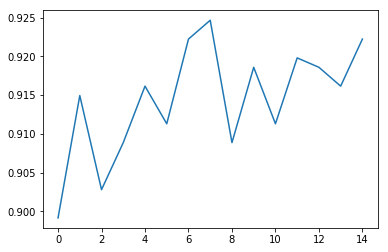

In [20]:

plt.plot(h.history['val_acc'])


## Step 4:  Trials for Bag of Words to Classify Images

The idea of Bag of Words model is to firstly cluster the features of images. The clusters are 'words'.And then build a histogram of each image with these clusters('words'). Images in the same category have the same pattern of histogram. Different image catelogies have differnet pattern of histogram.The histogram patterns are the bags which means images of one category in the same bag. We use supervised learning predict image categories with these histograms.

In this approach we will do these tasks to implement a BoW model.

1. Using SIFT to extract keypoints descriptors of images
2. Clustering these keypoints and calculate image histogram from the clusters
3. Using supervised learning to predict the label with the image histogram of clusters.

Because the collection set of keypoints of images is huge. The memory error occurs when cluster with huge keypoints. I suggest the total keypoints are controlled up to 50000. So we need to split the train and test with smaller datest.

In [5]:
from sklearn.model_selection import train_test_split
img_labels=data['target']
X_median_file1,X_median_file2,y_median1,y_median2 = train_test_split(img_files,img_labels,test_size=0.95,random_state=24)
X_train_file,X_test_file,y_train,y_test = train_test_split(X_median_file1,y_median1,test_size=0.2,random_state=24)
print ("We have %i images in train set" % len(X_train_file))
print ("We have %i images in test set" % len(X_test_file))


We have 365 images in train set
We have 92 images in test set


Using SIFT to extract keypoints descriptors of images

In [6]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline                               

def gen_sift_features(img_file):
    '''
    Generate SIFT features for images,return list of SIFT descriptors with same indicies as img_data
    
    '''
    # img_keypoints = {}
    img_descs = []

    print ('Generating SIFT descriptors for %i images' % len(img_file))

    for img in img_file:
       
        img=cv2.imread(img)
        #print (img.shape)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.xfeatures2d.SIFT_create()
        kp, desc = sift.detectAndCompute(gray, None)
        img_descs.append(desc)

    print ('SIFT descriptors generated.')
    return img_descs

X_train_desc=gen_sift_features(X_train_file)
X_test_desc=gen_sift_features(X_test_file)


Generating SIFT descriptors for 365 images
SIFT descriptors generated.
Generating SIFT descriptors for 92 images
SIFT descriptors generated.


In [7]:
print ("The  sample one image keypoints descriptors are",X_train_desc[0])
print ("The shape of samle image keypoints descriptor is", X_train_desc[0].shape )
print ("The number of keypoints of each image are not the same")
print ("The shape of sample image1 has %i keypoints" % len(X_train_desc[0]))
print ("The shape of sample image2 has %i keypoints" % len(X_train_desc[1]))


('The  sample one image keypoints descriptors are', array([[  8.,  38.,  18., ...,   0.,   0.,   9.],
       [ 76.,  71.,  44., ...,   0.,   0.,   0.],
       [ 38.,  28.,  11., ...,   0.,   2.,   2.],
       ..., 
       [  5.,  10.,  12., ...,   0.,   0.,   5.],
       [ 53.,  13.,   0., ...,   0.,   0.,  15.],
       [ 11.,  16.,   7., ...,   0.,   0.,   7.]], dtype=float32))
('The shape of samle image keypoints descriptor is', (1017, 128))
The number of keypoints of each image are not the same
The shape of sample image1 has 1017 keypoints
The shape of sample image2 has 629 keypoints


We use the `descriptorcorrect` function to remove the None of keypoint descriptor

In [8]:
def descriptorcorrect(X_descriptor,y_label):
    '''
    Check and remove the keypoint descriptor which is None
    '''
    X_desc_corr=[]
    y_label_corr=[]
    errorlist=[]
    for i in range(len(X_descriptor)):
        if np.array(X_descriptor[i]).any()==None :
            errorlist.append(i)
        else:
            X_desc_corr.append(X_descriptor[i])
            y_label_corr.append(y_label[i])
    print ("There are %i image keypoints descriptors are not None" % len(X_desc_corr))
    print ("The None keypoints descriptor image index are",errorlist)
    return X_desc_corr,y_label_corr

In [9]:
X_train_desc_corr,y_train_corr=descriptorcorrect(X_train_desc,y_train)
X_test_desc_corr,y_test_corr=descriptorcorrect(X_test_desc,y_test)

There are 365 image keypoints descriptors are not None
('The None keypoints descriptor image index are', [])
There are 92 image keypoints descriptors are not None
('The None keypoints descriptor image index are', [])


We collect keypoint descriptors into 1 list

In [10]:
X_train_desc_corr_coll=[]
for img in X_train_desc_corr:
    for kp in img:
        X_train_desc_corr_coll.append(kp)
print ("The total keypoint descriptors in X_train_desc_correction are %i" % len(X_train_desc_corr_coll))
X_test_desc_corr_coll=[]
for img in X_test_desc_corr:
    for kp in img:
        X_test_desc_corr_coll.append(kp)
print ("The total keypoint descriptors in X_test_desc_correction are %i" % len(X_test_desc_corr_coll))

The total keypoint descriptors in X_train_desc_correction are 200816
The total keypoint descriptors in X_test_desc_correction are 41338


Here notice that, we have 200816 keypoints in 365 images in train set and 41338 keypoints in 92 images in test set. I have memory error occur when clustering with the trainset. So just to demonstrate the concept, here I use test set for clustering because its keypoints space is much smaller than trainset.

I have tested for 3 clusters numbers which is 5,3,10 and see the silhouette_score of which is better(the higher).

I should mention that the clusters number is not the labels. We use cluster numbers to computer histogram of each image and use histogram to predict labels. So the cluster number can be less than the classes.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
K1=5
K2=3
K3=10
datafit=X_test_desc_corr_coll
clusterer1 =  KMeans(n_clusters=K1,random_state=0)
clusterer2 =  KMeans(n_clusters=K2,random_state=0)
clusterer3 =  KMeans(n_clusters=K3,random_state=0)
clusterer1.fit(datafit)
clusterer2.fit(datafit)
clusterer3.fit(datafit)
preds1 = clusterer1.predict(datafit)
preds2 = clusterer2.predict(datafit)
preds3 = clusterer3.predict(datafit)
print ("silhouette_score of  with  clusterer1:",silhouette_score(datafit,preds1))
print ("silhouette_score of  with  clusterer2:",silhouette_score(datafit,preds2))
print ("silhouette_score of  with  clusterer3:",silhouette_score(datafit,preds3))




('silhouette_score of  with  clusterer1:', 0.060953896)
('silhouette_score of  with  clusterer2:', 0.072775029)
('silhouette_score of  with  clusterer3:', 0.053655859)


We select the K2=3 with the highest silhouette_score.

In [12]:
# predict cluster result for each image
clustered_kp = [clusterer2.predict(img) for img in X_test_desc_corr]

# make a histogram of clustered keypoints for each image. These are the final features for supervised learning
img_hist = np.array([np.bincount(kp_words,minlength=K2) for kp_words in clustered_kp])


We evaluate the mean accuracy score on the train set, it is only be 18%. So the performance of testset is supposed be lower. The performance of BoW is much lower than our benchmark of CNN from scratch. So BoW is not a good idea on Image classification.

In [13]:
X_train_s=img_hist
y_train_s=y_test_corr
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
n_estimators=[50, 100, 250]
learning_rate=[1.0, 1.5]
ada_params={
        'n_estimators':n_estimators,
        'learning_rate':learning_rate}

ada = GridSearchCV(AdaBoostClassifier(), ada_params)
ada.fit(X_train_s, y_train_s)

print ('train score %f:'% ada.score(X_train_s, y_train_s))


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


train score 0.184783:


## Step 5: Test the Model

We select the CNN from transfer learning model as the final mode. We test the final model with

100%|██████████| 11/11 [00:00<00:00, 246.29it/s]


(11, 224, 224, 3)
The upload image is


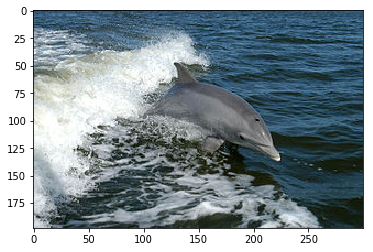

('The label of the upload image is:', 'dolphin')
('The prediction label is: ', 'dolphin')
('The max probability is: ', 0.99918991)
The predict time on image is 0.084708 seconds
The upload image is


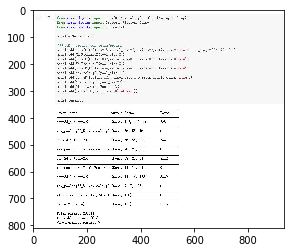

('The label of the upload image is:', 'text')
('The prediction label is: ', 'BACKGROUND_Google')
('The max probability is: ', 0.99960667)
The predict time on image is 0.103613 seconds
The upload image is


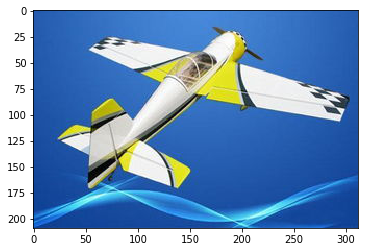

('The label of the upload image is:', 'airplane')
('The prediction label is: ', 'schooner')
('The max probability is: ', 0.68272918)
The predict time on image is 0.092698 seconds
The upload image is


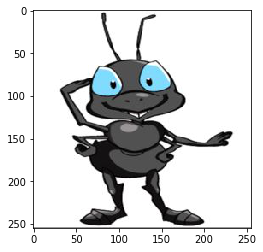

('The label of the upload image is:', 'cartoon ant')
('The prediction label is: ', 'BACKGROUND_Google')
('The max probability is: ', 0.71855038)
The predict time on image is 0.098377 seconds
The upload image is


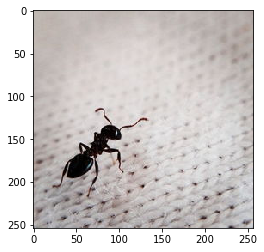

('The label of the upload image is:', 'ant')
('The prediction label is: ', 'scorpion')
('The max probability is: ', 0.71504694)
The predict time on image is 0.096526 seconds
The upload image is


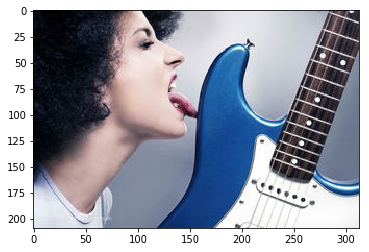

('The label of the upload image is:', 'bass')
('The prediction label is: ', 'BACKGROUND_Google')
('The max probability is: ', 0.94392365)
The predict time on image is 0.090956 seconds
The upload image is


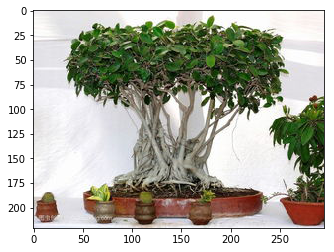

('The label of the upload image is:', 'bonsai')
('The prediction label is: ', 'bonsai')
('The max probability is: ', 0.99999988)
The predict time on image is 0.093008 seconds
The upload image is


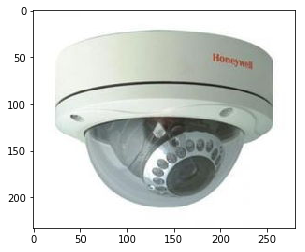

('The label of the upload image is:', 'new camera')
('The prediction label is: ', 'BACKGROUND_Google')
('The max probability is: ', 0.96034819)
The predict time on image is 0.101740 seconds
The upload image is


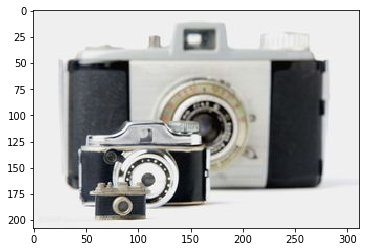

('The label of the upload image is:', 'camera')
('The prediction label is: ', 'camera')
('The max probability is: ', 0.99592066)
The predict time on image is 0.091316 seconds
The upload image is


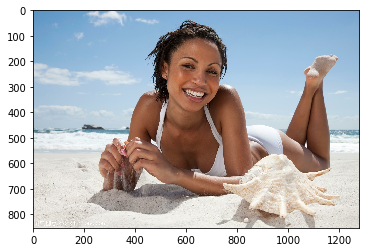

('The label of the upload image is:', 'human')
('The prediction label is: ', 'BACKGROUND_Google')
('The max probability is: ', 0.9726848)
The predict time on image is 0.085877 seconds
The upload image is


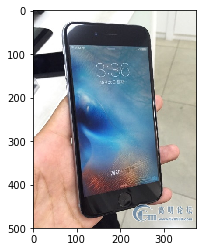

('The label of the upload image is:', 'phone')
('The prediction label is: ', 'laptop')
('The max probability is: ', 0.96693927)
The predict time on image is 0.092408 seconds


In [76]:
from PIL import Image
testfile=['Tursiops_truncatus_01.jpg','text.jpg','airplane.jpg','ant.jpg','ant2.jpg','bass.jpg','bonsai.jpg','camera.jpg','camera2.jpg','human_sea.jpg','phone.jpg']
label=['dolphin','text','airplane','cartoon ant','ant','bass','bonsai','new camera','camera','human','phone']
tensor=paths_to_tensor(testfile)
print (tensor.shape)
#plt.imshow(tensor[0])
#plt.show()
tensors_Resnet50=extract_Resnet50(tensor)
Resnet50_model_tf.load_weights('saved_models/weights.best.Resnet50_tf.hdf5')
for i in range(len(testfile)):
    
    print ("The upload image is")
    img=Image.open(testfile[i])
    plt.imshow(img)
    plt.show()
    
    start = time()
    prediction = [np.argmax(Resnet50_model_tf.predict(np.expand_dims(tensor, axis=0)))for tensor in tensors_Resnet50]
    probability=[Resnet50_model_tf.predict(np.expand_dims(tensor, axis=0)) for tensor in tensors_Resnet50]
    end = time()
    print ("The label of the upload image is:", label[i])
    #print (prediction)
    print('The prediction label is: ' ,data['target_names'][prediction[i]])
    print ("The max probability is: ",np.max(probability[i]))
    print ("The predict time on image is %f seconds" % (end-start))

We see that the model correctly classified the typical object image such as: dolphin,bonsai,old camera. It classified the phone to laptop and ant to scorpion,but I think it is closed to right answer and reasonable. It wrongly classified :text,airplan,cartoon_ant,bass,new camera,human. They were all classified as Background_google. I looked in to the images of Background_google, it is a miscellaneous folder. So the model predicted all the image unknown to Background_google. The model does badly in the images has more than one object such as 'bass.jpg'. And also does badly in the new style of object such as new camera.